In [1]:
# import basic utility packages
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

# import model training packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# import metrics packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# importing the visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the sample dataset
data = pd.read_excel('/Users/hargun/Desktop/CM_ML_training_colinear_removed.xlsx')
data.head()

,z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PP_x,CM_x,CM_y,CM_z
0,-5.297,-2.448,-22.021,0.310,-22.155,-12.926,5.728,-31.907,-9.78206,-19.0619,-1.66384
1,-2.037,-0.456,-26.823,3.522,-26.804,-11.442,5.782,-30.579,-7.32496,-24.0915,2.92988
2,-5.617,-1.504,-25.327,2.342,-25.391,-14.133,5.914,-28.278,-7.63225,-22.1851,-2.02365
3,-1.416,-1.647,-26.022,0.466,-26.029,-12.983,5.493,-30.592,-7.98994,-22.4696,2.70457
4,-7.443,-0.447,-21.629,1.748,-21.660,-11.126,8.203,-27.702,-6.63725,-18.8869,-3.30866


In [4]:
# feature engineering on xData
# NOT REQUIRED AS OF NOW (MAYBE IN FUTURE)

In [5]:
# separating the independent and dependent variables
xData = data[['z', 'PL_L_x', 'PL_L_y', 'PL_R_x', 'PL_R_y', 'PM_x', 'PM_y','PP_x']]
yData = data[['CM_x', 'CM_y', 'CM_z']]
# train-test split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 71, test_size = 0.25, shuffle = True)

# resetting the indices
xTrain.reset_index(inplace = True, drop = True)
xTest.reset_index(inplace = True, drop = True)
yTrain.reset_index(inplace = True, drop = True)
yTest.reset_index(inplace = True, drop = True)

xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((148, 8), (50, 8), (148, 3), (50, 3))

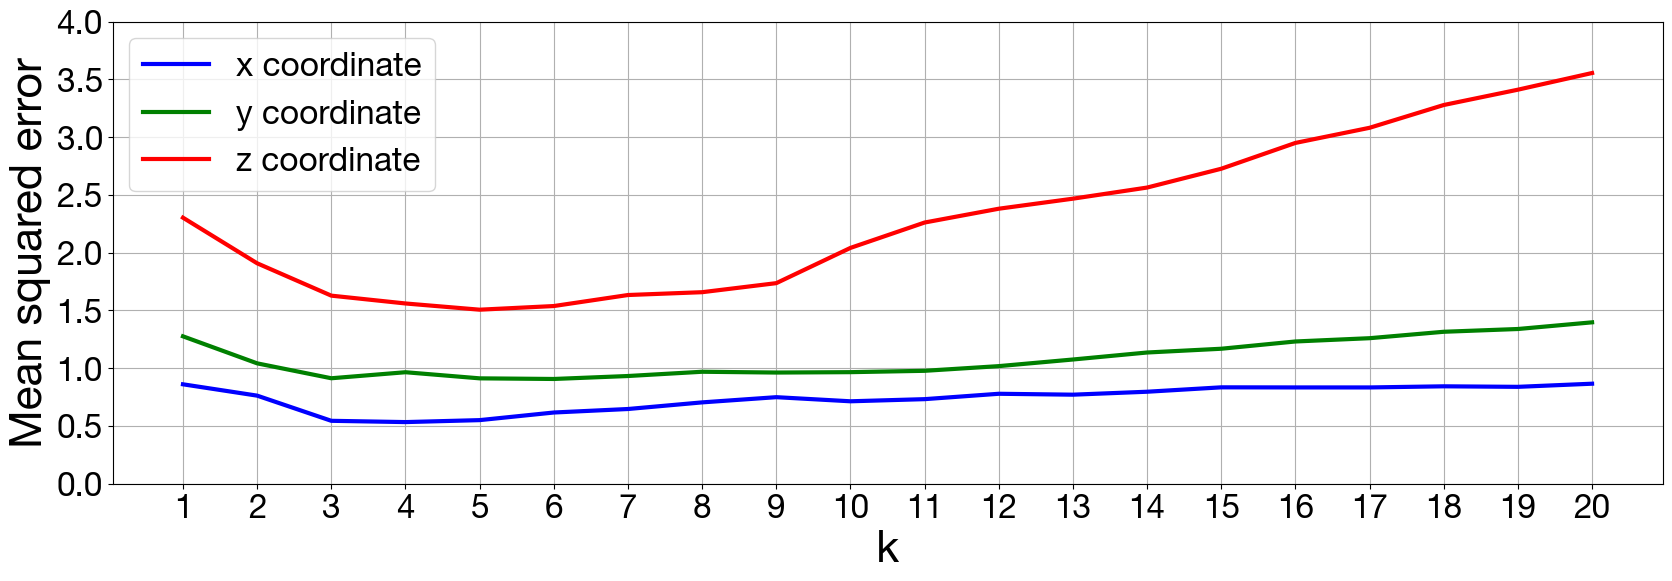

In [32]:
# fitting the model to the dataset

xMSEValues = []
yMSEValues = []
zMSEValues = []

for K in range(1, 21):
    
    # optimal K calculation for CM_x
    modelX = KNeighborsRegressor(n_neighbors = K)
    modelX.fit(xTrain, yTrain['CM_x'])
    yPredX = modelX.predict(xTest)
    xMSECurrent = mean_squared_error(yTest['CM_x'], yPredX)
    xMSEValues.append(xMSECurrent)
    
    # optimal K calculation for CM_y
    modelY = KNeighborsRegressor(n_neighbors = K)
    modelY.fit(xTrain, yTrain['CM_y'])
    yPredY = modelY.predict(xTest)
    yMSECurrent = mean_squared_error(yTest['CM_y'], yPredY)
    yMSEValues.append(yMSECurrent)
    
    # optimal K calculation for CM_x
    modelZ = KNeighborsRegressor(n_neighbors = K)
    modelZ.fit(xTrain, yTrain['CM_z'])
    yPredZ = modelZ.predict(xTest)
    zMSECurrent = mean_squared_error(yTest['CM_z'], yPredZ)
    zMSEValues.append(zMSECurrent)

plt.rcParams['font.family'] = 'Helvetica Neue'
plt.rcParams['font.size'] = 24 # Default font size
plt.figure(figsize=(20, 6))
# Plot the data
plt.plot(np.arange(1, 21), xMSEValues, color='blue', label='x coordinate', linewidth=3)
plt.plot(np.arange(1, 21), yMSEValues, color='green', label='y coordinate', linewidth=3)
plt.plot(np.arange(1, 21), zMSEValues, color='red', label='z coordinate', linewidth=3)

# Set labels and grid
plt.xlabel("k", fontsize=32)
plt.ylabel("Mean squared error", fontsize=32)
plt.grid(True)
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0, 4.5, 0.5))

# Add legend with increased font size
plt.legend(fontsize=24)

# Show the plot
plt.show()

In [ ]:
# applying the model with the most optimal K for each
kX = 5
kY = 3
kZ = 2

# optimal K calculation for CM_x
modelX = KNeighborsRegressor(n_neighbors = kX)
modelX.fit(xTrain, yTrain['CM_x'])


# optimal K calculation for CM_y
modelY = KNeighborsRegressor(n_neighbors = kY)
modelY.fit(xTrain, yTrain['CM_y'])
yPredY = modelY.predict(xTest)

# optimal K calculation for CM_x
modelZ = KNeighborsRegressor(n_neighbors = kZ)
modelZ.fit(xTrain, yTrain['CM_z'])
yPredZ = modelZ.predict(xTest)

In [ ]:
# predicting the train data
yPredX = pd.DataFrame(modelX.predict(xTrain), columns = ['CM_x_pred'])
yPredY = pd.DataFrame(modelY.predict(xTrain), columns = ['CM_y_pred'])
yPredZ = pd.DataFrame(modelZ.predict(xTrain), columns = ['CM_z_pred'])

# consolidated train data
dataTrain = pd.concat([xTrain, yTrain, yPredX, yPredY, yPredZ], axis = 1)
dataTrain.head()

In [ ]:
# metrics calculations for train data
mseXTrain, mseYTrain, mseZTrain = mean_squared_error(dataTrain['CM_x'], dataTrain['CM_x_pred']), mean_squared_error(dataTrain['CM_y'], dataTrain['CM_y_pred']), mean_squared_error(dataTrain['CM_z'], dataTrain['CM_z_pred'])
print("Train Metrics:")
print("MSE X: " + str(mseXTrain))
print("MSE Y: " + str(mseYTrain))
print("MSE Z: " + str(mseZTrain))

In [ ]:
# predicting the test data 
yPredX = pd.DataFrame(modelX.predict(xTest), columns = ['CM_x_pred'])
yPredY = pd.DataFrame(modelY.predict(xTest), columns = ['CM_y_pred'])
yPredZ = pd.DataFrame(modelZ.predict(xTest), columns = ['CM_z_pred'])

# consolidated test data
dataTest = pd.concat([xTest, yTest, yPredX, yPredY, yPredZ], axis = 1)
dataTest.head()

In [ ]:
# metrics calculations for test data
mseXTest, mseYTest, mseZTest = mean_squared_error(dataTest['CM_x'], dataTest['CM_x_pred']), mean_squared_error(dataTest['CM_y'], dataTest['CM_y_pred']), mean_squared_error(dataTest['CM_z'], dataTest['CM_z_pred'])
print("Test Metrics:")
print("MSE X: " + str(mseXTest))
print("MSE Y: " + str(mseYTest))
print("MSE Z: " + str(mseZTest))

In [ ]:
# analysis by removing irrelevant features one by one
xCoefficients = ['PL_R_y', 'PL_L_y', 'z', 'PL_L_x', 'PL_R_x', 'PM_y', 'PM_x', 'PP_x', ]
coefficientsMSETrainX = []
coefficientsMSETestX = []

yCoefficients = ['PL_R_x', 'PL_L_x', 'PM_x', 'PP_x', 'z', 'PM_y','PL_L_y', 'PL_R_y']
coefficientsMSETrainY = []
coefficientsMSETestY = []

zCoefficients = ['PP_x', 'PM_x', 'PL_R_x', 'PL_L_x', 'PM_y', 'PL_R_y', 'PL_L_y', 'z']
coefficientsMSETrainZ = []
coefficientsMSETestZ = []

while(len(xCoefficients) > 0):
    
    # Running the pipeline for CM_x    
    # separating the independent and dependent variables
    xData = data[xCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 30, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainX.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestX.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    xCoefficients.pop(0)
    
    # Running the pipeline for CM_y    
    # separating the independent and dependent variables
    xData = data[yCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 31, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainY.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestY.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    yCoefficients.pop(0)
    
    # Running the pipeline for CM_z    
    # separating the independent and dependent variables
    xData = data[zCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 30, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainZ.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestZ.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    zCoefficients.pop(0)

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainX, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestX, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_x")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainY, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestY, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_y")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainZ, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestZ, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_z")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

plt.show()

In [ ]:
# CM_x scatter
plt.scatter(dataTrain['CM_x'], dataTrain['CM_x_pred'], s = 4)
plt.scatter(dataTest['CM_x'], dataTest['CM_x_pred'], s = 4)
plt.plot(np.arange(-11,11), np.arange(-11,11))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()
# CM_y scatter
plt.scatter(dataTrain['CM_y'], dataTrain['CM_y_pred'], s = 4)
plt.scatter(dataTest['CM_y'], dataTest['CM_y_pred'], s = 4)
plt.plot(np.arange(-25,-12), np.arange(-25,-12))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()
# CM_y scatter
plt.scatter(dataTrain['CM_z'], dataTrain['CM_z_pred'], s = 4)
plt.scatter(dataTest['CM_z'], dataTest['CM_z_pred'], s = 4)
plt.plot(np.arange(-5,17), np.arange(-5,17))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()


In [ ]:
data['x error'] = np.abs(dataTest['CM_x'] - dataTest['CM_x_pred'])
data['y error'] = np.abs(dataTest['CM_y'] - dataTest['CM_y_pred'])
data['z error'] = np.abs(dataTest['CM_z'] - dataTest['CM_z_pred'])

# Calculate Euclidean error
data['euclidean error'] = np.sqrt((dataTest['CM_x'] - dataTest['CM_x_pred'])**2 + 
                                  (dataTest['CM_y'] - dataTest['CM_y_pred'])**2 + 
                                  (dataTest['CM_z'] - dataTest['CM_z_pred'])**2)

# Preparing data for violin plot
error_data = pd.melt(data, value_vars=['x error', 'y error', 'z error', 'euclidean error'],
                     var_name='Error Type', value_name='Error Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Error Type', y='Error Value', data=error_data)
plt.title('Distribution of Errors')
plt.ylabel('Error Value (mm)')
plt.xlabel('Error Type')
plt.show()

#Mean errors value
from sklearn.metrics import mean_absolute_error
maex = mean_absolute_error(dataTest['CM_x'], dataTest['CM_x_pred'])
maey = mean_absolute_error(dataTest['CM_y'], dataTest['CM_y_pred'])
maez = mean_absolute_error(dataTest['CM_z'], dataTest['CM_z_pred'])
print(f"Mean Absolute Error x: {maex:.3f} mm")
print(f"Mean Absolute Error y: {maey:.3f} mm")
print(f"Mean Absolute Error z: {maez:.3f} mm")
distances = np.sqrt((dataTest['CM_x'] - dataTest['CM_x_pred'])**2 +
                    (dataTest['CM_y'] - dataTest['CM_y_pred'])**2 +
                    (dataTest['CM_z'] - dataTest['CM_z_pred'])**2)

# Calculate mean of these distances
mean_euclidean_error = np.mean(distances)

print(f"Mean Euclidean Error: {mean_euclidean_error:.3f} mm")